In [1]:
# Ass-18_Forecasting_CocaCola Q2

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_excel(r'C:\Users\Admin\Desktop\Database\18.Forecasting\CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.shape

(42, 2)

<Axes: >

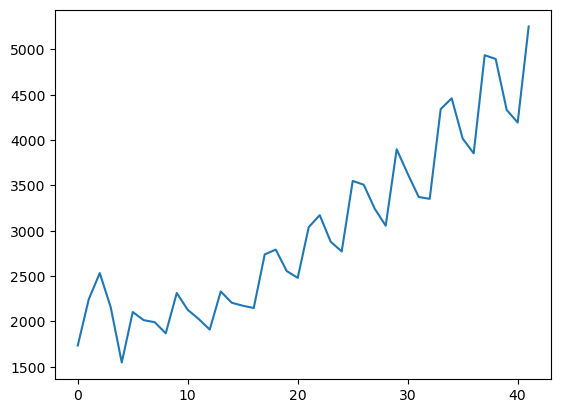

In [5]:
df.Sales.plot()

In [7]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [10]:
# Data Driven Model approach
# Splitting data

In [11]:
Train = df.head(32)
Test = df.tail(10)

# Moving Average

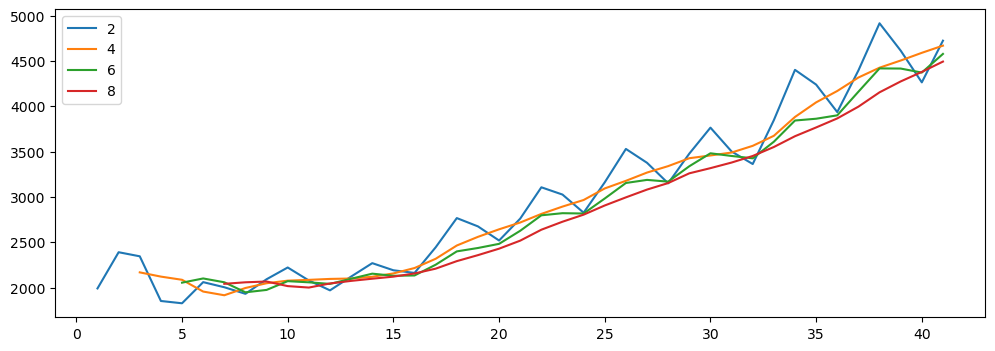

In [13]:
plt.figure(figsize=(12,4))
for i in range(2, 9, 2):
    df["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 'best')

# Time Series Decomposition Plot

<Figure size 1200x1000 with 0 Axes>

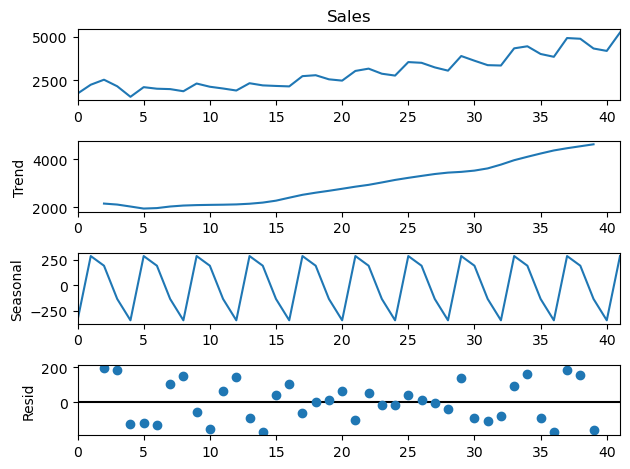

In [15]:
plt.figure(figsize=(12,10))
decompose_ts_add = seasonal_decompose(df.Sales,period=4)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


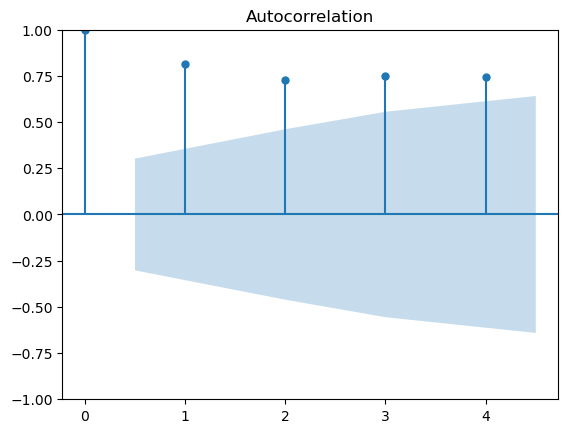

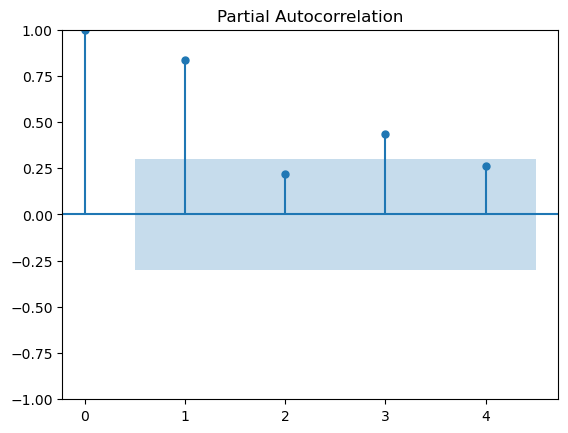

In [17]:
tsa_plots.plot_acf(df.Sales,lags=4)
tsa_plots.plot_pacf(df.Sales,lags=4)
plt.show()

# Evaluation Metric MAPE

In [19]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [21]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

22.724050848585573

# Holt method

In [23]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_9936\208563640.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


16.72065094194317

In [24]:
# Holts winter exponential smoothing with additive seasonality and additive trend

In [25]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

13.343697973780909

In [26]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [27]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

12.192035276650357

In [28]:
# Final Model by combining train and test

In [29]:
hwe_model_add_add = ExponentialSmoothing(df["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model


In [30]:
# Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    5153.673171
43    4693.138725
44    4612.584649
45    5629.508603
46    5535.938846
47    5075.404400
48    4994.850324
49    6011.774278
50    5918.204521
51    5457.670075
dtype: float64